# <span style="color:red"> Laboratorio di Simulazione Numerica (NSL) </span>
## <span style="color:blue">  Esercitazione 10 </span>

In questa esercitazione andremo a risolvere il ***TSP*** utilizzando il *simulated annealing* (***SA***) e la libreria per il calcolo parallelo ``MPI``. Confronteremo i risultati con quelli ottenuti nella **Esercitazione 9**.

### Esercizio 10.1
Abbiamo modificato il codice della **Esercitazione 9** per implementare il ***SA***. Quest'ultimo è un metodo di ottimizzazione che sfrutta il "raffreddamento" del sistema per trovare lo stato di minima energia. In questo caso l' "energia" da minimizzare è la distanza (calcolata come norma $L^{(2)}(\vec r)$ ) che il commesso viaggiatore percorre visitando le città; sono imposte le solite condizioni al problema.

Rispetto al codice ***GA***, la classe ``population`` è gestita in modo differente; ad ogni generazione è presente un singolo individuo (quindi un singolo percorso) che subisce delle mutazioni con una certa probabilità (v. ***Esercitazione 9***). Sfruttiamo l'algoritmo di Metropolis per campionare la densità di probabilità associata al peso di Boltzmann, che usa come pseudo-energia la distanza dell'individuo:

$$P = e^{-\beta L^{(2)}(r)}, \qquad  \beta = \frac{1}{T}$$

Con questa proabilità, proponiamo la mossa di sostituire l'individuo con quello mutato; questo algoritmo viene ripetuto ad ogni generazione. Intanto, il sistema si raffredda: dopo un certo numero di generazioni $N_{cool}$, la temperatura diminuisce ( $\beta$ aumenta) di un certo fattore fissato  $\beta_{increase}$. Il commesso si muoverà percorrendo distanze minori, muovendosi in un ambiente più "freddo". Il raffreddamento avviene in maniera lenta e graduale in modo da permettere al sistema di adattarsi.

Applichiamo il codice ad un ***TSP*** con $32$ città, distribuite su una circonferenza di raggio $1$ e all'interno di un quadrato di lato $1$. Evolviamo l'individuo per $80mila$ generazioni, partendo da una configurazione casuale del percorso.

I valori iniziali dei parametri sono: $\beta=0.9$ , $\beta_{increase} = 0.9$ , $N_{cool} = 1000$; il valore di questi parametri è fissato in modo da avere un rate di accettazione di Metropolis intorno al $50\%$.

Di seguito riportiamo l'andamento della distanza in funzione della generazione.

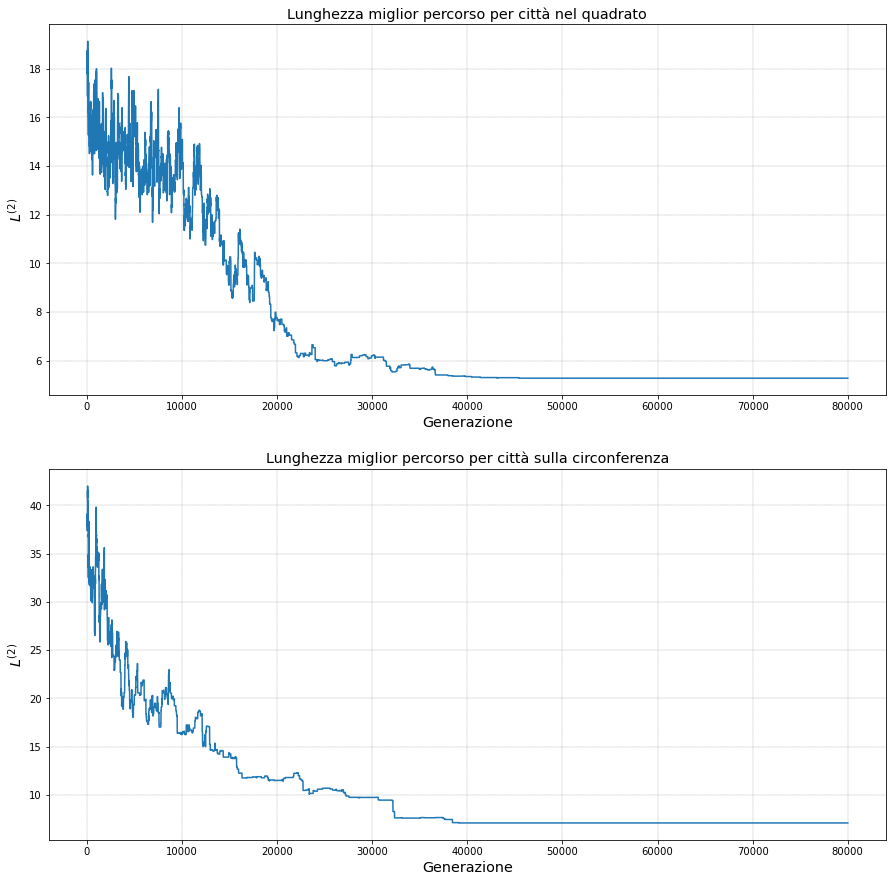

Valore di distanza migliore nel quadrato:  5.27595
Valore di distanza migliore sulla circonferenza:  7.10612


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

n_gen = int(8e4)

fig1, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,15))

# Square 
sq_gen, sq_ave = np.loadtxt("10.1/Data/square_ave.out", usecols=(0,2),unpack=True)

axs[0].plot(sq_gen, sq_ave)
axs[0].set_title(r"Lunghezza miglior percorso per città nel quadrato", fontsize="x-large")
axs[0].set_xlabel("Generazione", fontsize="x-large")
axs[0].set_ylabel(r"$L^{(2)}$", fontsize="x-large")
axs[0].grid(True, linestyle="--", linewidth=0.2, color='.25', zorder=-10)


# Circumference
circ_gen, circ_ave = np.loadtxt("10.1/Data/circle_ave.out", usecols=(0,2), unpack=True)

axs[1].plot(circ_gen, circ_ave)
axs[1].set_title(r"Lunghezza miglior percorso per città sulla circonferenza", fontsize="x-large")
axs[1].set_xlabel("Generazione", fontsize="x-large")
axs[1].set_ylabel(r"$L^{(2)}$", fontsize="x-large")
axs[1].grid(True, linestyle="--", linewidth=0.2, color='.25', zorder=-10)

plt.show()

print("Valore di distanza migliore nel quadrato: ", sq_ave[n_gen-1])
print("Valore di distanza migliore sulla circonferenza: ", circ_ave[n_gen-1])

Vediamo come dopo circa $40mila$ generazioni entrambi i sistemi si stabilizzano; il valore finale della migliore distanza, riportato sopra, è in buon accordo con quello ricavato nella **Esercitazione 9** tramite ***GA***: $SQ = 4.99196$ , $C = 6.24243$.

Riportiamo anche il migliore percorso, che confrontiamo con quello calcolato tramite ***GA***.

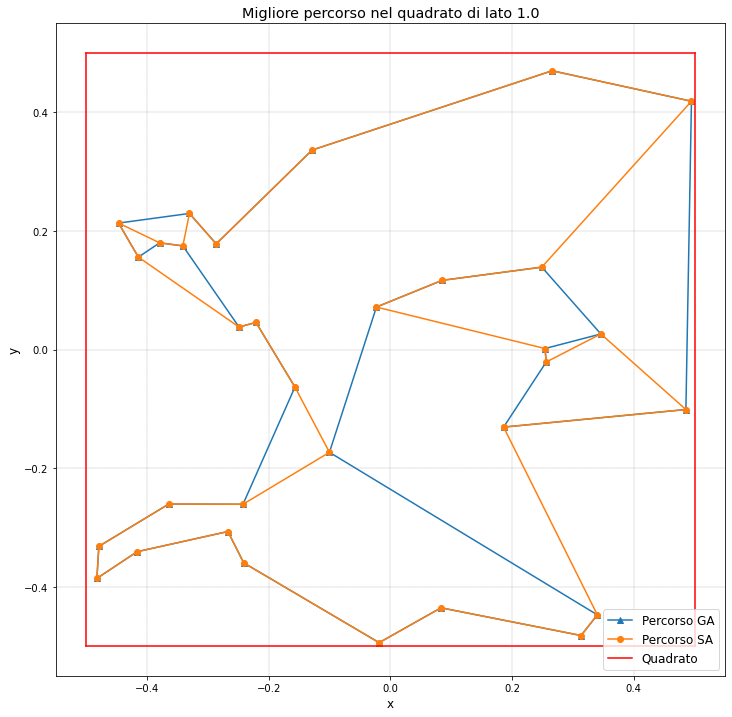

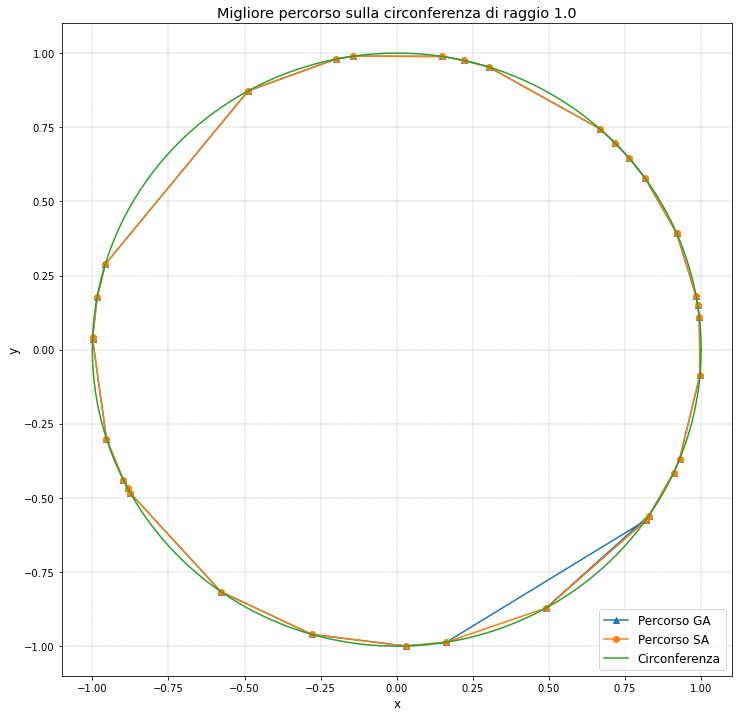

In [22]:
# Best path

fig2, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12,12))

# Square
side = 1.
N = 100

sq_city_GA, sq_x_GA, sq_y_GA = np.loadtxt("10.1/Data/square_best.out", unpack=True)
sq_city_SA, sq_x_SA, sq_y_SA = np.loadtxt("../Lez9/09.1/Data/square_best.out", unpack=True)


ax1.plot(sq_x_GA, sq_y_GA,'-^',label='Percorso GA')
ax1.plot(sq_x_SA, sq_y_SA,'-o',label='Percorso SA')


#Square Frame
x_left = np.linspace(-side/2., side/2., N)
x_right = np.linspace(-side/2., side/2., N)
for i in range(N):
    x_left[i] = -side/2.
    x_right[i] = +side/2.
    
x = np.linspace(-side/2., side/2., 100)


ax1.plot(x,x_right,color='red', label="Quadrato")
ax1.plot(x_right,x,color='red')
ax1.plot(x_left,x,color='red')
ax1.plot(x,x_left,color='red')

ax1.set_title("Migliore percorso nel quadrato di lato "+str(side), fontsize="x-large")
ax1.set_xlabel("x",fontsize="large")
ax1.set_ylabel("y",fontsize="large")
ax1.legend(loc='lower right', fontsize="large")
ax1.grid(True, linestyle="--", linewidth=0.2, color='.25', zorder=-10)



# Circumference
fig2, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12,12))

radius = 1.
N = 100

circ_city_GA, circ_x_GA, circ_y_GA = np.loadtxt("10.1/Data/circle_best.out", unpack=True)
circ_city_SA, circ_x_SA, circ_y_SA = np.loadtxt("../Lez9/09.1/Data/circle_best.out", unpack=True)

ax1.plot(circ_x_GA, circ_y_GA,'-^',label='Percorso GA')
ax1.plot(circ_x_SA, circ_y_SA,'-o',label='Percorso SA')

#Circle frame
theta = np.linspace(0,2*np.pi,500)
x = radius*np.cos(theta)
y = radius*np.sin(theta)
ax1.plot(x,y,label='Circonferenza')

ax1.set_title("Migliore percorso sulla circonferenza di raggio "+str(radius), fontsize="x-large")
ax1.set_xlabel("x",fontsize="large")
ax1.set_ylabel("y",fontsize="large")
ax1.legend(loc='lower right', fontsize="large")
ax1.grid(True, linestyle="--", linewidth=0.2, color='.25', zorder=-10)

plt.show()

In entrambi i casi (soprattutto per la circonferenza) molti passaggi tra le città seguono la stessa sequenza per ***GA*** e ***SA***.

### Esercizio 10.2
Approcciamo ora il ***TSP*** attraverso il calcolo parallelo. Sfruttiamo la libreria ``MPI`` per dividere il codice ***GA*** in $4$ nodi, che denominiamo *Continenti*. Ogni *Continente* svolge indipendentemente la sua ricerca del percorso migliore tramite ***GA***, partendo da una configurazione casuale di città, per un numero fissato di generazioni.

Ogni $N_{migr}$ generazioni, i *continenti* si scambiano in modo casuale i loro migliori individui.

Le configurazioni dei parametri e dei rate di mutazione sono le stesse della **Esercitazione 9**; applichiamo il codice ad un insieme di $32$ città all'interno di un quadrato di lato $1$. Evolviamo il sistema per $2000$ generazioni, e scambiamo gli individui tra i *continenti* ogni $100$ generazioni.

Di seguito riportiamo i risultati ottenuti, la migliore lunghezza e il miglior percorso, per ogni continente.

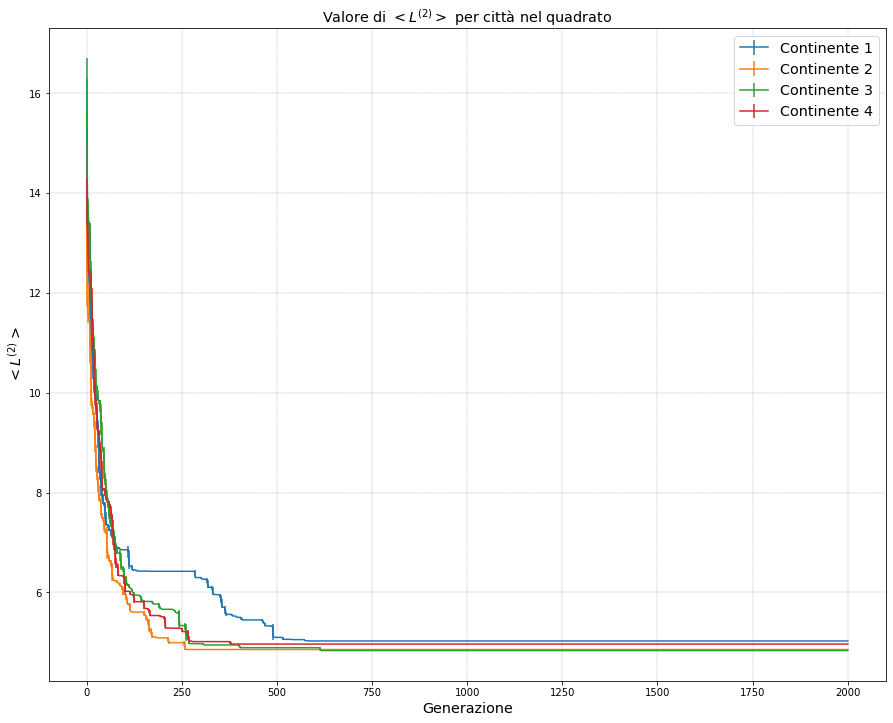

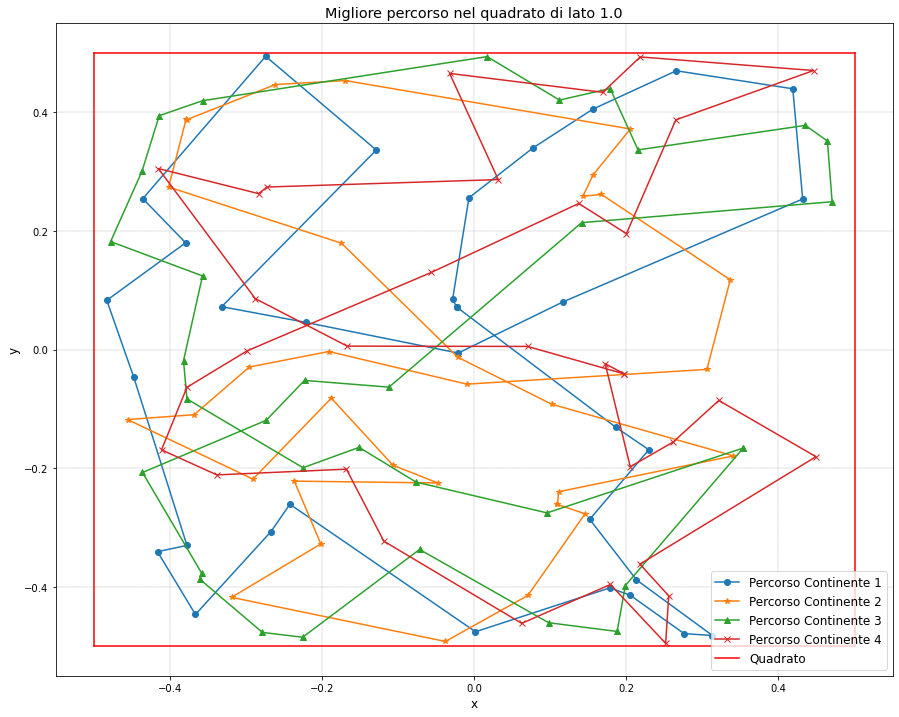

Valore di distanza migliore Continente 1:  5.02532
Valore di distanza migliore Continente 2:  4.85406
Valore di distanza migliore Continente 3:  4.83321
Valore di distanza migliore Continente 4:  4.96354


In [24]:
n_gen = 2000

# Average Square

fig1, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,12))

sq_gen_0, sq_ave_0, sq_err_0 = np.loadtxt("10.2/Data/sq_ave_0.out", unpack=True)
sq_gen_1, sq_ave_1, sq_err_1 = np.loadtxt("10.2/Data/sq_ave_1.out", unpack=True)
sq_gen_2, sq_ave_2, sq_err_2 = np.loadtxt("10.2/Data/sq_ave_2.out", unpack=True)
sq_gen_3, sq_ave_3, sq_err_3 = np.loadtxt("10.2/Data/sq_ave_3.out", unpack=True)


ax.errorbar(sq_gen_0, sq_ave_0, yerr=sq_err_0, label="Continente 1")
ax.errorbar(sq_gen_1, sq_ave_1, yerr=sq_err_1, label="Continente 2")
ax.errorbar(sq_gen_2, sq_ave_2, yerr=sq_err_2, label="Continente 3")
ax.errorbar(sq_gen_3, sq_ave_3, yerr=sq_err_3, label="Continente 4")


ax.set_title(r"Valore di $<L^{(2)}>$ per città nel quadrato", fontsize="x-large")
ax.set_xlabel("Generazione", fontsize="x-large")
ax.set_ylabel(r"$<L^{(2)}>$", fontsize="x-large")
ax.grid(True, linestyle="--", linewidth=0.2, color='.25', zorder=-10)
ax.legend(fontsize="x-large")


# Square Best Path

fig2, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(15,12))

side = 1.
N = 100

sq_city_0, sq_x_0, sq_y_0 = np.loadtxt("10.2/Data/square_best_0.out", unpack=True)
sq_city_1, sq_x_1, sq_y_1 = np.loadtxt("10.2/Data/square_best_1.out", unpack=True)
sq_city_2, sq_x_2, sq_y_2 = np.loadtxt("10.2/Data/square_best_2.out", unpack=True)
sq_city_3, sq_x_3, sq_y_3 = np.loadtxt("10.2/Data/square_best_3.out", unpack=True)

ax1.plot(sq_x_0, sq_y_0,'-o',label='Percorso Continente 1')
ax1.plot(sq_x_1, sq_y_1,'-*',label='Percorso Continente 2')
ax1.plot(sq_x_2, sq_y_2,'-^',label='Percorso Continente 3')
ax1.plot(sq_x_3, sq_y_3,'-x',label='Percorso Continente 4')


#Square Frame
x_left = np.linspace(-side/2., side/2., N)
x_right = np.linspace(-side/2., side/2., N)
for i in range(N):
    x_left[i] = -side/2.
    x_right[i] = +side/2.
    
x = np.linspace(-side/2., side/2., 100)


ax1.plot(x,x_right,color='red', label="Quadrato")
ax1.plot(x_right,x,color='red')
ax1.plot(x_left,x,color='red')
ax1.plot(x,x_left,color='red')

ax1.set_title("Migliore percorso nel quadrato di lato "+str(side), fontsize="x-large")
ax1.set_xlabel("x",fontsize="large")
ax1.set_ylabel("y",fontsize="large")
ax1.legend(loc='lower right', fontsize="large")
ax1.grid(True, linestyle="--", linewidth=0.2, color='.25', zorder=-10)

plt.show()

print("Valore di distanza migliore Continente 1: ", sq_ave_0[n_gen-1])
print("Valore di distanza migliore Continente 2: ", sq_ave_1[n_gen-1])
print("Valore di distanza migliore Continente 3: ", sq_ave_2[n_gen-1])
print("Valore di distanza migliore Continente 4: ", sq_ave_3[n_gen-1])

Vediamo come tutti i *continenti* trovano un valore stabile per la distanza più breve dopo circa $600$ generazioni; i valori trovati sono molto vicini tra loro.